In [2]:
import numpy as np
from scipy import special
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
plt.style.use('science')

SMALL_SIZE = 9
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
# plt.rc('legend', titlesize=5)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [9]:
muF = 0.145
temps = 8.617e-14  * np.array([1000, 10e9, 10e10])
labels = ['$10^3$', '$10^9$', '$10^{10}$']

cols = ['#f0bc02','#00aa83' ,'#006a9c']
cols2 = [ '#ffa600', '#bc5090','#0073a8']

linsty = ['-', '--', ':']

trans = [0.1, 0.01, 0.001]
translab = ['0.1', '0.01', '0.001']

def init_FD(E, T):
    return special.expit(-(E - muF) / T)

def init_step(E):
    if ( E > muF):
        return 1
    else:
        return 0
    

def final_FD(E,T, x):
    return special.expit((E + x*muF - muF)/T)


def make_plot():
    
    domain = np.linspace(0.1, 0.18, 100)
    
        
    fig, ax = plt.subplots(ncols = 2, figsize = (7, 3), dpi = 300, sharey = True)
    fig.subplots_adjust(hspace=0, wspace= 0.1)
    for i in range(len(temps)):
        ax[0].plot(domain, init_FD(domain, temps[1])*final_FD(domain, temps[1], trans[i]), color = cols2[i], linestyle = linsty[i], label = translab[i])
#         ax1.plot(domain, final_FD(domain, temps[i]), color = cols[i], linestyle = linsty[i])
        
    ax[0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax[0].legend(loc = 'upper right', shadow = False).set_title(title = '$q_0/\\mu_F$', prop={"size": 6})
    ax[0].set_xlabel('$E$ [GeV]')
    ax[0].text(0.88, 0.7, '$T_\star = 10^6$ K', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes,  fontsize=6)
    ax[0].set_ylabel('$f(E)(1 - f(E\'))$')
    ax[0].set_xlim(0.100, 0.18)
    
    for i in range(len(temps)):
        ax[1].plot(domain, init_FD(domain, temps[i])*final_FD(domain, temps[i], trans[0]), color = cols[i], linestyle = linsty[i], label = labels[i])
#         ax1.plot(domain, final_FD(domain, temps[i]), color = cols[i], linestyle = linsty[i])
        
    ax[1].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax[1].legend(loc = 'upper right', shadow = False).set_title(title = '$T_\star$ [K]]', prop={"size": 6})
    ax[1].set_xlabel('$E$ [GeV]')
    ax[1].text(0.88, 0.7, '$q_0 = 0.1\\mu_F$', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes,  fontsize=6)
    ax[1].set_xlim(0.10, 0.18)
    
    
    plt.savefig('overlap2.pdf')
    plt.show()
    

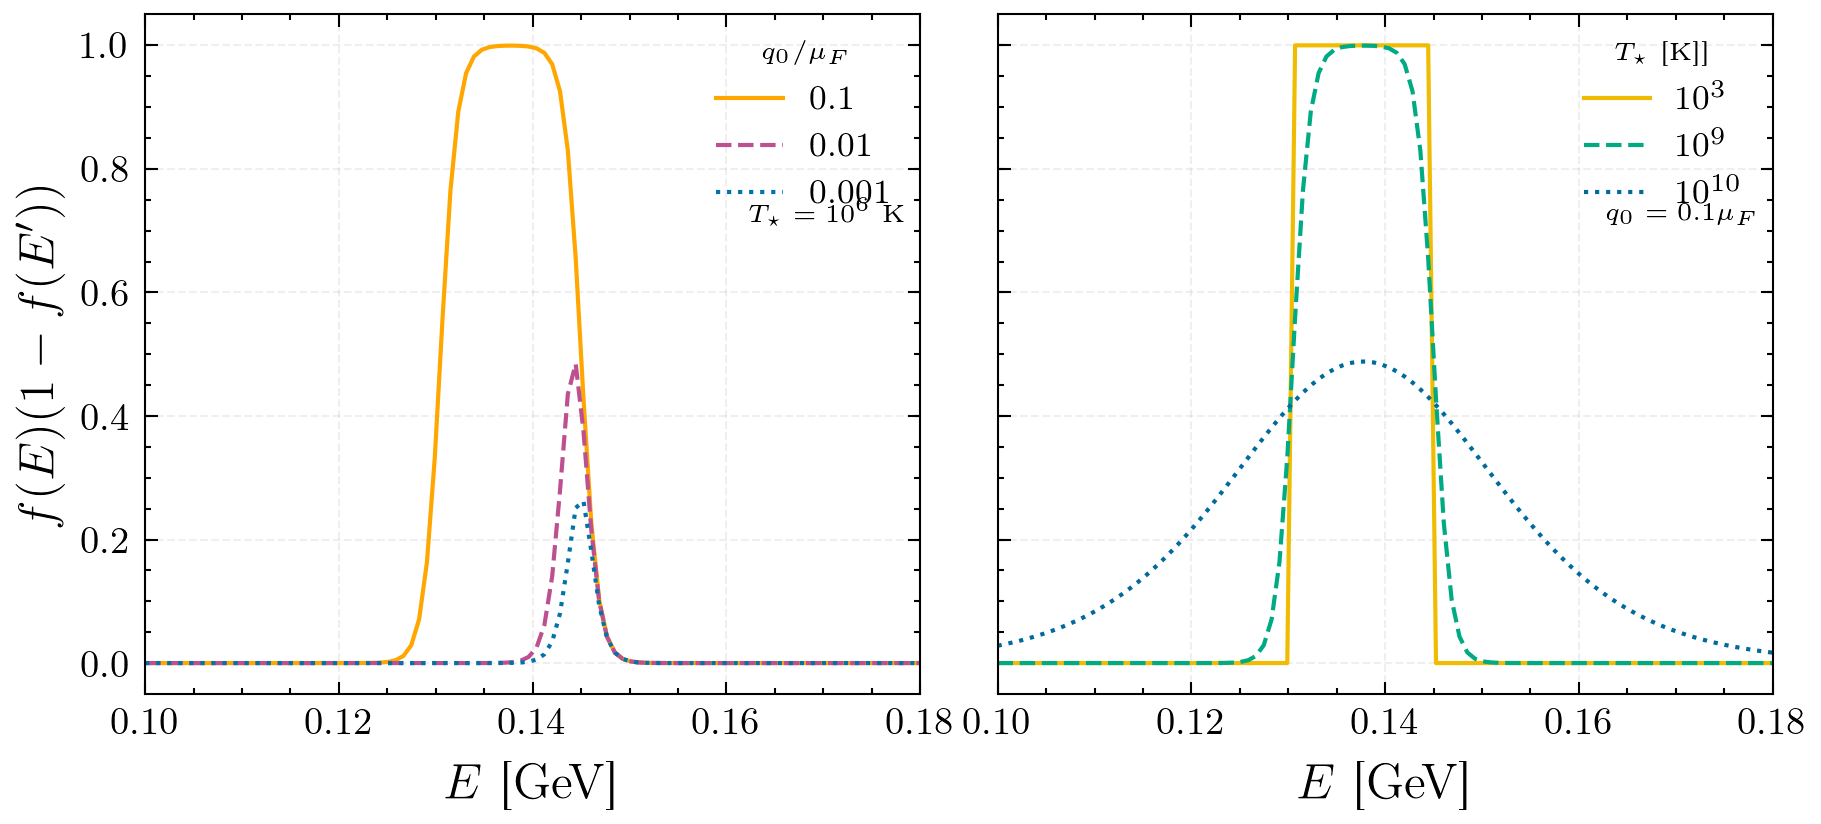

In [10]:
make_plot()

In [11]:
def fd_plot():
    domain = np.linspace(0.1, 0.18, 100)
    fig, ax = plt.subplots(figsize = (5, 3), dpi = 300)
    for i in range(len(temps)):
        ax.plot(domain, init_FD(domain, temps[i]), color = cols[i], linestyle = linsty[i], label = labels[i])
#         ax1.plot(domain, final_FD(domain, temps[i]), color = cols[i], linestyle = linsty[i])
        
    ax.grid(b=True, which='major',  linestyle='--', alpha=0.2)
#     ax.legend(loc = 'upper right', shadow = False).set_title(title = '$T_\star$ [K]]', prop={"size": 6})
    ax.set_xlabel('$E$ [GeV]')
    ax.legend(loc = 'upper right', shadow = False).set_title(title = '$T_\star$ [K]', prop={"size": 6})
    ax.set_xlabel('$E$ [GeV]')
#     ax.text(0.12, 0.7, '$T_\star = 10^4$ K', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,  fontsize=6)
    ax.set_ylabel('$f(E)$')
    ax.set_xlim(0.10, 0.18)
    
    plt.savefig('FDdists.pdf')

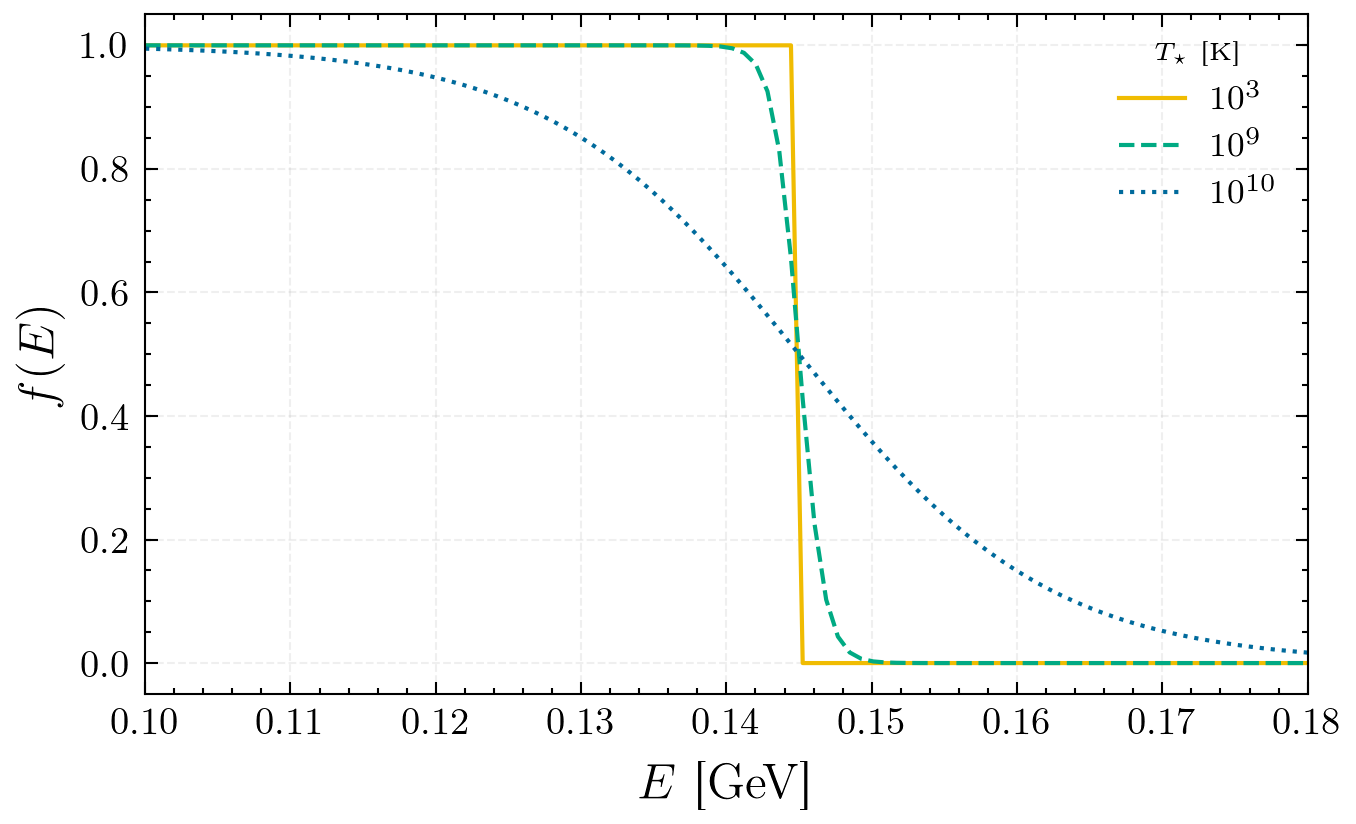

In [12]:
fd_plot()